# K MEANS SPOTIFY

In [39]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [40]:
df = pd.read_csv('song_db_tommella.csv')
df = df.iloc[:,1:]
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.482,0.721,-6.839,0.0321,0.7310,0.000000,0.1890,0.557,95.263,369600
1,0.547,0.257,-12.358,0.0252,0.9070,0.183000,0.0935,0.169,75.752,187867
2,0.283,0.716,-9.632,0.0986,0.4470,0.000000,0.3990,0.828,201.960,233000
3,0.805,0.558,-5.226,0.0410,0.1640,0.000022,0.0546,0.965,114.950,147600
4,0.396,0.473,-7.670,0.0345,0.3260,0.000124,0.1090,0.385,133.449,219027
...,...,...,...,...,...,...,...,...,...,...
486,0.414,0.428,-11.097,0.0278,0.3820,0.000243,0.1480,0.282,145.075,377093
487,0.621,0.601,-5.616,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
488,0.425,0.242,-15.424,0.0267,0.8800,0.011800,0.1950,0.477,92.472,228160
489,0.632,0.686,-6.116,0.0395,0.4370,0.000000,0.1930,0.650,121.414,166027


In [41]:
## scale the data
scaler = StandardScaler()
scaler.fit(df)

x = scaler.transform(df)
x = pd.DataFrame(x, columns = df.columns)
x

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.444783,0.606315,0.720126,-0.512253,1.209379,-0.293849,-0.072368,-0.234704,-0.917407,1.771485
1,-0.023684,-1.545673,-0.907986,-0.614394,1.803376,1.037347,-0.611319,-1.902413,-1.604836,-0.402431
2,-1.733993,0.583126,-0.103812,0.472147,0.250882,-0.293849,1.112758,0.930114,2.841837,0.137456
3,1.647754,-0.149664,1.195964,-0.380507,-0.704239,-0.293689,-0.830849,1.518970,-0.223777,-0.884111
4,-1.001929,-0.543886,0.474980,-0.476726,-0.157491,-0.292947,-0.523845,-0.973998,0.427996,-0.029691
...,...,...,...,...,...,...,...,...,...,...
486,-0.885317,-0.752591,-0.535989,-0.575906,0.031508,-0.292081,-0.303750,-1.416715,0.837614,1.861117
487,0.455721,0.049766,1.080913,1.203415,-1.081562,-0.293849,1.457008,-0.664526,-0.160886,-0.692286
488,-0.814054,-1.615242,-1.812460,-0.592190,1.712252,-0.208012,-0.038508,-0.578561,-1.015742,0.079559
489,0.526984,0.443988,0.933412,-0.402711,0.217132,-0.293849,-0.049795,0.165031,0.003968,-0.663684


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

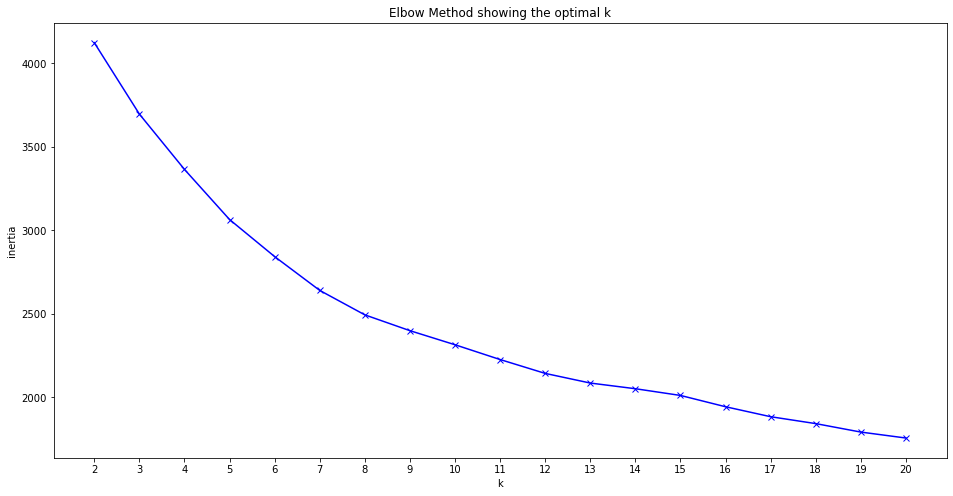

In [42]:
## FIND BEST K
K = range(2, 21)
inertia = []

for k in K:
    #print("Training a K-Means model with {} clusters! ".format(k))
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [43]:
## K MEANS
kmeans = KMeans(n_clusters=16, random_state=1234)
kmeans.fit(x)

KMeans(n_clusters=16, random_state=1234)

In [44]:
kmeans.labels_

array([ 2, 13,  7,  6,  9,  5,  0, 11, 15, 11,  7, 13, 14,  6,  5,  4, 15,
       10,  9, 11,  6,  1,  9,  9,  1,  0, 10,  6,  1,  2,  3,  9, 13,  0,
        6, 10,  9, 15,  9,  9,  5, 13, 15, 12, 11, 13,  0, 15, 12, 11, 14,
        6,  5, 10,  6,  7,  1, 15,  1, 15,  5,  6,  1,  5,  2,  8,  3, 15,
       15,  6,  5,  8,  9,  1, 15, 15,  5,  1,  7,  1, 14, 10, 15, 15,  9,
       13,  9,  4,  6,  5, 15, 10,  3,  3,  6, 11,  2,  2, 13,  7,  6,  9,
        5,  0, 11, 15, 11,  7, 13, 14,  6,  5,  4, 15, 10,  9, 11,  6,  1,
        9,  9,  1,  0, 10,  6,  1,  2,  3,  9, 13,  0,  6, 10,  9, 15,  9,
        9,  5, 13, 15, 12, 11, 13,  0, 15, 12, 11, 14,  6,  5, 10,  6,  7,
        1, 15,  1, 15,  5,  6,  1,  5,  2,  8,  3, 15, 15,  6,  5,  8,  9,
        1, 15, 15,  5,  1,  7,  1, 14, 10, 15, 15,  9, 13,  9,  4,  6,  5,
       15, 10,  3,  3,  6, 11,  2,  8, 15,  6,  1,  2, 15,  1, 10,  5, 14,
        1, 15,  1, 13,  6,  1,  3, 10, 11,  7,  1,  0, 14,  4,  9,  5,  9,
        5, 12,  2, 12,  8

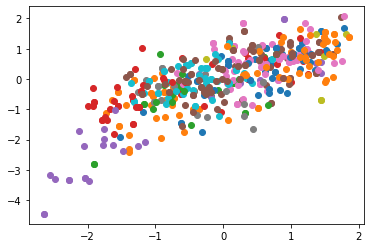

In [45]:
# assign a cluster to each example
labels = kmeans.predict(x)
clusters = np.unique(labels)
for cluster in clusters:
    row_ix = np.where(labels == cluster)
    pyplot.scatter(x.to_numpy()[row_ix, 1], x.to_numpy()[row_ix, 2])
pyplot.show()

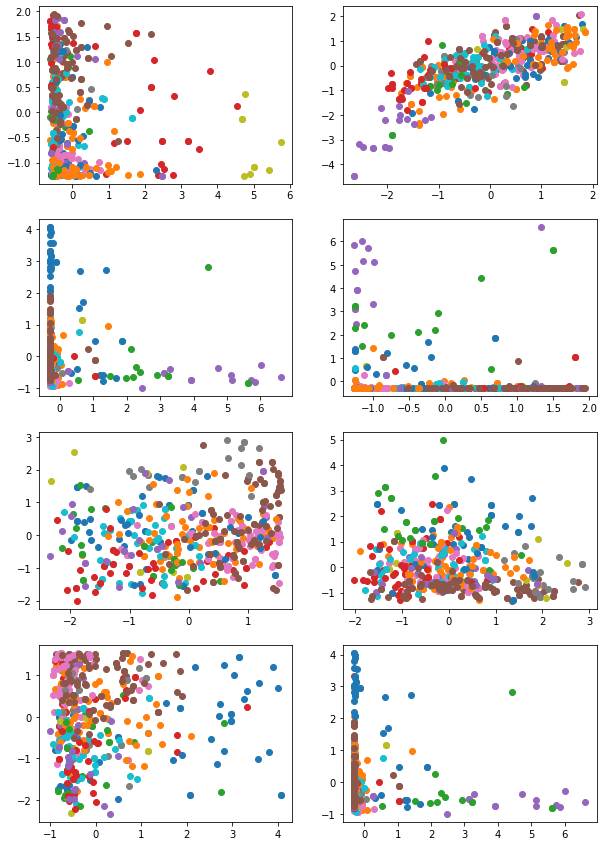

In [46]:
from random import randint
fig, ax = plt.subplots(4,2, figsize = (10,15))

for i in range(1,9):
    r1 = randint(1,8)
    r2 = r1+1
    plt.subplot(4,2,i)
    
    for cluster in clusters:
        row_ix = np.where(labels == cluster)
        pyplot.scatter(x.to_numpy()[row_ix,r1], x.to_numpy()[row_ix, r2])
pyplot.show()


In [47]:
import seaborn as sns
#sns.pairplot(df)

In [48]:
clusters = kmeans.predict(x)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     24
1     42
2     16
3     21
4     13
5     36
6     61
7     21
8      9
9     51
10    30
11    44
12    12
13    32
14    19
15    60
dtype: int64

In [49]:
#x["cluster"] = clusters
#x

In [50]:
### SAVE MODEL AND SCALER
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("scaler_tommella.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans_tommella.pickle", "wb") as f:
    pickle.dump(kmeans,f)


In [51]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.482,0.721,-6.839,0.0321,0.7310,0.000000,0.1890,0.557,95.263,369600
1,0.547,0.257,-12.358,0.0252,0.9070,0.183000,0.0935,0.169,75.752,187867
2,0.283,0.716,-9.632,0.0986,0.4470,0.000000,0.3990,0.828,201.960,233000
3,0.805,0.558,-5.226,0.0410,0.1640,0.000022,0.0546,0.965,114.950,147600
4,0.396,0.473,-7.670,0.0345,0.3260,0.000124,0.1090,0.385,133.449,219027
...,...,...,...,...,...,...,...,...,...,...
486,0.414,0.428,-11.097,0.0278,0.3820,0.000243,0.1480,0.282,145.075,377093
487,0.621,0.601,-5.616,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
488,0.425,0.242,-15.424,0.0267,0.8800,0.011800,0.1950,0.477,92.472,228160
489,0.632,0.686,-6.116,0.0395,0.4370,0.000000,0.1930,0.650,121.414,166027


## SONG INPUT

select_song = input('Please enter your song: ')

if select_song.lower() in str(list(df["Songs"])).lower():
    r = randint(0, len(df.index))
    print("Other song recommended: ", df.iloc[r, 1])
else:
    print("THE SONG SELECTED IS NOT IN THE DATABASE")


In [52]:
x

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.444783,0.606315,0.720126,-0.512253,1.209379,-0.293849,-0.072368,-0.234704,-0.917407,1.771485
1,-0.023684,-1.545673,-0.907986,-0.614394,1.803376,1.037347,-0.611319,-1.902413,-1.604836,-0.402431
2,-1.733993,0.583126,-0.103812,0.472147,0.250882,-0.293849,1.112758,0.930114,2.841837,0.137456
3,1.647754,-0.149664,1.195964,-0.380507,-0.704239,-0.293689,-0.830849,1.518970,-0.223777,-0.884111
4,-1.001929,-0.543886,0.474980,-0.476726,-0.157491,-0.292947,-0.523845,-0.973998,0.427996,-0.029691
...,...,...,...,...,...,...,...,...,...,...
486,-0.885317,-0.752591,-0.535989,-0.575906,0.031508,-0.292081,-0.303750,-1.416715,0.837614,1.861117
487,0.455721,0.049766,1.080913,1.203415,-1.081562,-0.293849,1.457008,-0.664526,-0.160886,-0.692286
488,-0.814054,-1.615242,-1.812460,-0.592190,1.712252,-0.208012,-0.038508,-0.578561,-1.015742,0.079559
489,0.526984,0.443988,0.933412,-0.402711,0.217132,-0.293849,-0.049795,0.165031,0.003968,-0.663684
